In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
data=pd.read_csv("C:\\Users\\Asus\\Downloads\\Iris.csv")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data.drop(0,axis=0,inplace=True)

In [88]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [89]:
data.describe()

,0,1,2,3,4,5
count,150,150,150,150,150,150
unique,150,35,23,43,22,3
top,50,5.0,3.0,1.5,0.2,Iris-setosa
freq,1,10,26,14,28,50


In [90]:
data.Species.unique()

AttributeError: 'DataFrame' object has no attribute 'Species'

In [65]:
data.drop("Id",inplace=True,axis=True)

In [92]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()

In [99]:
data.Species=ln.fit_transform(data.loc[5])

SyntaxError: invalid syntax (<ipython-input-99-5410c196c4e4>, line 1)

In [98]:
data.head()

,0,1,2,3,4,5
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [166]:
batman=DecisionTreeClassifier(criterion="gini",max_depth=2.5)

In [167]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop("Species",axis=1), data.Species, test_size=0.25, random_state=42)


In [168]:
batman.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2.5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [169]:
ypred=batman.predict(xtest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy: 97.37 %


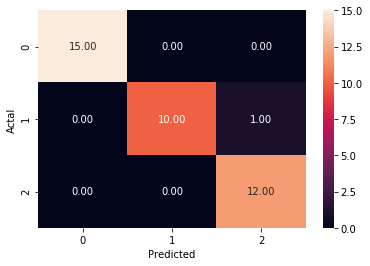

In [170]:
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [171]:
# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [173]:
lg.fit(xtrain,ytrain)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
ypred=lg.predict(xtest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy: 100.00 %


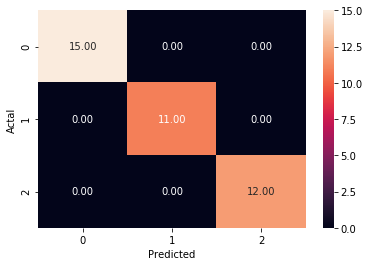

In [175]:
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [176]:
# Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [178]:
rf.fit(xtrain,ytrain)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
ypred=rf.predict(xtest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy: 97.37 %


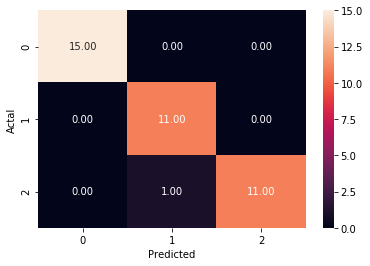

In [180]:
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [181]:
from sklearn.model_selection import GridSearchCV


In [195]:
from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,param_grid=param_dist)


In [198]:
cv_rf.fit(xtrain,ytrain)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: n_estimators must be an integer, got <class 'method'>.

In [193]:
rf.fit(xtrain,ytrain)


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: n_estimators must be an integer, got <class 'method'>.

In [184]:
rf=RandomForestClassifier(cv_rf.get_params)

In [185]:
rf.fit(xtrain,ytrain)

ValueError: n_estimators must be an integer, got <class 'method'>.

In [9]:
# Clustering Model

In [91]:
data.head()

,0,1,2,3,4,5
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
data.drop("Species",axis=1,inplace=True)

In [71]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
import numpy as np
data1=np.array(data.to_string(header=False))
data1.reshape()

array('0    5.1  3.5  1.4  0.2\n1    4.9  3.0  1.4  0.2\n2    4.7  3.2  1.3  0.2\n3    4.6  3.1  1.5  0.2\n4    5.0  3.6  1.4  0.2\n5    5.4  3.9  1.7  0.4\n6    4.6  3.4  1.4  0.3\n7    5.0  3.4  1.5  0.2\n8    4.4  2.9  1.4  0.2\n9    4.9  3.1  1.5  0.1\n10   5.4  3.7  1.5  0.2\n11   4.8  3.4  1.6  0.2\n12   4.8  3.0  1.4  0.1\n13   4.3  3.0  1.1  0.1\n14   5.8  4.0  1.2  0.2\n15   5.7  4.4  1.5  0.4\n16   5.4  3.9  1.3  0.4\n17   5.1  3.5  1.4  0.3\n18   5.7  3.8  1.7  0.3\n19   5.1  3.8  1.5  0.3\n20   5.4  3.4  1.7  0.2\n21   5.1  3.7  1.5  0.4\n22   4.6  3.6  1.0  0.2\n23   5.1  3.3  1.7  0.5\n24   4.8  3.4  1.9  0.2\n25   5.0  3.0  1.6  0.2\n26   5.0  3.4  1.6  0.4\n27   5.2  3.5  1.5  0.2\n28   5.2  3.4  1.4  0.2\n29   4.7  3.2  1.6  0.2\n30   4.8  3.1  1.6  0.2\n31   5.4  3.4  1.5  0.4\n32   5.2  4.1  1.5  0.1\n33   5.5  4.2  1.4  0.2\n34   4.9  3.1  1.5  0.1\n35   5.0  3.2  1.2  0.2\n36   5.5  3.5  1.3  0.2\n37   4.9  3.1  1.5  0.1\n38   4.4  3.0  1.3  0.2\n39   5.1  3.4  1.5

In [79]:
pd.DataFrame(data1)

ValueError: Must pass 2-d input